In [354]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [355]:
import json
import pandas as pd
def read_json_file(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

train_set = read_json_file('./pos_datasets/train_set.json')
test_set = read_json_file('./pos_datasets/test_set.json')
word_dic_and_embedding = read_json_file('./pos_datasets/fasttext_word.json')

tgt = pd.read_csv('./pos_datasets/tgt.txt', header=None )

tgt



,0
0,[PAD]
1,ADP
2,PROPN
3,PART
4,SYM
5,PUNCT
6,NOUN
7,CCONJ
8,AUX
9,X


In [356]:
train_set["0"], len(train_set)

({'tokens': ['Islam', 'Skilled'],
  'ud_tags': ['PROPN', 'PROPN'],
  'ptb_tags': ['NNP', 'NNP']},
 12543)

In [357]:
train_set["0"]["tokens"], train_set["0"]["ud_tags"], train_set["0"]["ptb_tags"]  

(['Islam', 'Skilled'], ['PROPN', 'PROPN'], ['NNP', 'NNP'])

In [358]:
test_set["0"], len(test_set)

({'tokens': ['complimented',
   'value',
   'Oprah',
   'cemented',
   'surfing',
   '90',
   'smarter',
   '973-3634',
   'Humanpixel',
   'cemented',
   'modernization',
   'begin']},
 500)

In [359]:
len(word_dic_and_embedding["[PAD]"]), len(word_dic_and_embedding)

(300, 19674)

In [360]:
train_set_df = pd.DataFrame(train_set)
train_set_df

,0,1,2,3,4,5,6,7,8,9,...,12533,12534,12535,12536,12537,12538,12539,12540,12541,12542
tokens,"[Islam, Skilled]","[origination, Great, attorney]","[Figuratively, Others, fill, intents, installe...","[Discovery, alarms, bag, dishonest, puff, arro...","[read, 202.456.1111, versions, airliner, uplan...","[frothing, perceiving, airliner, Color, ages, ...","[rejuvenate, perceiving, yellow, Engine, shock...","[stepped, Ordinarily, http://www.infoukes.com/...","[withdrawing, Elizabeth, Lol, multi-national, ...","[rift, Pacheco, 2545, 973-3634, Selah, JR, Ric...",...,"[padded, slightly, fill, gunpowder, _, ingredi...","[arrogant, Iris, Qaeda, arrogant, abt, arrogan...","[rift, clan, alt.animals.horses.breeding, perc...","[Oslo, clash, newsletter, della]","[FAQ, Load, 973-3634, anyway, Cafe]","[neoconservative, begin, school, conservation,...","[southwestern, Horizon, Windsor, Game, comes, ...","[NOTE, 01/13/2001, innovations, Traders, permi...","[pyrimidal, Ordinarily, 973-3634, grandeur, un...","[clan, quit, MORALITY, installed, quit, 01:09,..."
ud_tags,"[PROPN, PROPN]","[NUM, NUM, NOUN]","[NOUN, AUX, AUX, VERB, PUNCT, ADP, DET, NOUN, ...","[PRON, NOUN, PART, NOUN, VERB, PUNCT, NOUN, VE...","[PRON, AUX, VERB, DET, NOUN, NOUN, ADP, SCONJ,...","[PRON, AUX, DET, NOUN, NOUN, VERB, ADP, PUNCT]","[PRON, VERB, PRON, ADJ, ADP, DET, ADJ, NOUN, P...","[PROPN, PART, NOUN, AUX, VERB, PART, VERB, SCO...","[AUX, PRON, VERB, PRON, VERB, PART, VERB, ADJ,...","[CCONJ, PART, VERB, DET, NOUN, ADP, DET, ADJ, ...",...,"[PRON, AUX, AUX, ADJ, CCONJ, PRON, AUX, PART, ...","[PUNCT, X, PUNCT, PUNCT, VERB, PUNCT, X, PUNCT...","[CCONJ, SCONJ, NOUN, AUX, DET, NOUN, PUNCT, PR...","[ADJ, PUNCT, NOUN, NOUN]","[INTJ, VERB, DET, NOUN, PUNCT]","[X, PUNCT, ADP, NOUN, NUM, PUNCT, NOUN, PUNCT,...","[ADV, DET, ADJ, PROPN, NOUN, NOUN, PUNCT, INTJ...","[CCONJ, DET, NOUN, PRON, VERB, X, NOUN, PRON, ...","[ADV, AUX, DET, NOUN, SCONJ, VERB, ADV, PUNCT,...","[SCONJ, PRON, VERB, PUNCT, PRON, AUX, PART, VE..."
ptb_tags,"[NNP, NNP]","[CD, CD, NN]","[NN, MD, VB, VBN, ,, IN, DT, NN, IN, DT, VBN, ...","[PRP$, NN, POS, NN, VBZ, ``, NN, VBN, IN, JJ, ...","[PRP, MD, VB, DT, NN, NN, IN, IN, VBG, DT, NN,...","[WP, VBZ, DT, NN, NN, VBN, IN, .]","[EX, VBZ, NN, JJ, IN, DT, JJ, NN, ,, CC, NN, R...","[NNP, POS, NN, MD, VB, TO, VB, IN, PRP, VBP, D...","[VBP, PRP, VB, PRP, VBP, TO, VB, JJR, .]","[CC, TO, VB, DT, NN, IN, DT, JJ, NN, VBZ, TO, ...",...,"[DT, MD, VB, JJ, CC, PRP, VBZ, RB, VB, ,, MD, ...","[``, FW, ., '', VBZ, ``, FW, '', ,, CC, ``, PR...","[CC, IN, NN, VBZ, DT, NN, ,, NN, MD, VB, IN, D...","[JJ, HYPH, NN, NNS]","[UH, VB, DT, NN, .]","[LS, ., IN, NN, CD, ,, NN, -LRB-, NN, -RRB-, M...","[RB, DT, JJ, NNP, NN, NN, ,, UH, .]","[CC, DT, NN, PRP, VBP, GW, NN, PRP, MD, VB, IN...","[RB, VBZ, DT, NN, IN, VBG, RB, ,, NN, .]","[IN, PRP, VBP, ,, PRP, VBP, RB, VBG, .]"


In [361]:
pd_tokens = train_set_df.loc["tokens"]
pd_ud_tags = train_set_df.loc["ud_tags"]
pd_ptb_tags = train_set_df.loc["ptb_tags"]

pd_tokens, pd_ud_tags, pd_ptb_tags

(0                                         [Islam, Skilled]
 1                           [origination, Great, attorney]
 2        [Figuratively, Others, fill, intents, installe...
 3        [Discovery, alarms, bag, dishonest, puff, arro...
 4        [read, 202.456.1111, versions, airliner, uplan...
                                ...                        
 12538    [neoconservative, begin, school, conservation,...
 12539    [southwestern, Horizon, Windsor, Game, comes, ...
 12540    [NOTE, 01/13/2001, innovations, Traders, permi...
 12541    [pyrimidal, Ordinarily, 973-3634, grandeur, un...
 12542    [clan, quit, MORALITY, installed, quit, 01:09,...
 Name: tokens, Length: 12543, dtype: object,
 0                                           [PROPN, PROPN]
 1                                         [NUM, NUM, NOUN]
 2        [NOUN, AUX, AUX, VERB, PUNCT, ADP, DET, NOUN, ...
 3        [PRON, NOUN, PART, NOUN, VERB, PUNCT, NOUN, VE...
 4        [PRON, AUX, VERB, DET, NOUN, NOUN, ADP, SCONJ

In [362]:
tokens = np.array(pd_tokens)
ud_tags = np.array(pd_ud_tags)
ptb_tags = np.array(pd_ptb_tags)

In [363]:
tokens
number_of_tokens = sum(tokens, [])
len(number_of_tokens)

204605

샘플의 최대 길이 : 159
샘플의 평균 길이 : 16.312286


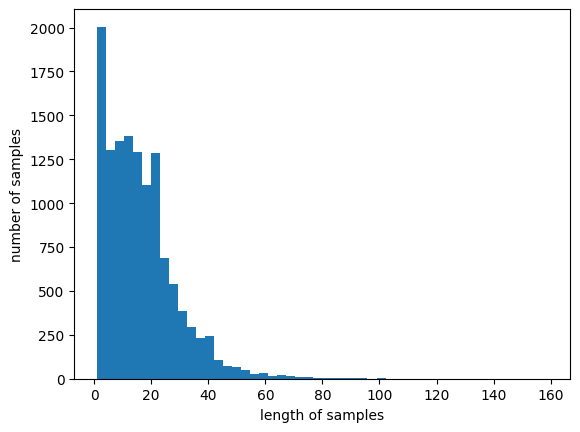

In [364]:
import matplotlib.pyplot as plt 

print('샘플의 최대 길이 : %d' % max(len(l) for l in tokens))
print('샘플의 평균 길이 : %f' % (sum(map(len, tokens))/len(tokens)))
plt.hist([len(s) for s in tokens], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [365]:
max_words = 20 # 최대 단어 개수     # 문장 길이

# 배열의 각 요소에서 20개의 단어만 선택하는 함수
def select_words(arr):
    return [word for word in arr[:max_words]]

# 배열의 각 요소에서 20개의 단어만 선택하는 코드
new_tokens = np.array([select_words(arr) if len(arr) > max_words else arr for arr in tokens], dtype=object)
new_ud_tags = np.array([select_words(arr) if len(arr) > max_words else arr for arr in ud_tags], dtype=object)
new_ptb_tags = np.array([select_words(arr) if len(arr) > max_words else arr for arr in ptb_tags], dtype=object)

new_tokens_max_len = max(len(lst) for lst in new_tokens)      # 가장 긴 리스트의 길이
new_ud_tags_max_len = max(len(lst) for lst in new_ud_tags)      # 가장 긴 리스트의 길이
new_ptb_tags_max_len = max(len(lst) for lst in new_ptb_tags)      # 가장 긴 리스트의 길이

new_tokens_max_len, new_ud_tags_max_len, new_ptb_tags_max_len


(20, 20, 20)

In [366]:
max_len = 20
pad_token = '[PAD]'
new_data_padded = []
for sentence in new_tokens:
    if len(sentence) < max_len:
        num_padding = max_len - len(sentence)
        sentence = sentence + [pad_token] * num_padding     # sentence = [pad_token] * num_padding + sentence
    else:
        sentence = sentence[:max_len]
    new_data_padded.append(sentence)
    
new_data_padded[0:2], np.array(new_data_padded).shape 

([['Islam',
   'Skilled',
   '[PAD]',
   '[PAD]',
   '[PAD]',
   '[PAD]',
   '[PAD]',
   '[PAD]',
   '[PAD]',
   '[PAD]',
   '[PAD]',
   '[PAD]',
   '[PAD]',
   '[PAD]',
   '[PAD]',
   '[PAD]',
   '[PAD]',
   '[PAD]',
   '[PAD]',
   '[PAD]'],
  ['origination',
   'Great',
   'attorney',
   '[PAD]',
   '[PAD]',
   '[PAD]',
   '[PAD]',
   '[PAD]',
   '[PAD]',
   '[PAD]',
   '[PAD]',
   '[PAD]',
   '[PAD]',
   '[PAD]',
   '[PAD]',
   '[PAD]',
   '[PAD]',
   '[PAD]',
   '[PAD]',
   '[PAD]']],
 (12543, 20))

In [367]:
train_data = new_data_padded
train_data[0:2]#, train_data.shape

#train_data = train_data[0:2]

#train_data

[['Islam',
  'Skilled',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]'],
 ['origination',
  'Great',
  'attorney',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]',
  '[PAD]']]

In [368]:
dic = word_dic_and_embedding

In [369]:
idx = list(range(0,len(dic)))

dic_list = list(dic.keys())

id_to_word = dict(zip(idx, dic_list))

word_to_id = {i: w for w, i in id_to_word.items()}
#word_to_id

In [370]:
len(dic)

19674

In [371]:
len(train_data)

12543

# Train_dataset(Word to idx(int))

In [372]:
# 일련번호 데이터
train_inputs = []
for s in train_data:                                 ##### 문장별 반복
    #print(s)
    #print("print SSSSS")
    row= []
    for w in s:
        #print(w)
        #print("WWWWWWWWW")
        if w in word_to_id:
            row.append(word_to_id[w])
            #print(row)
        else:
            row.append(word_to_id['[UNK]'])
    #print(row)                                    ##### 번호 나열
    train_inputs.append(row)
train_inputs = np.array(train_inputs)

train_inputs, train_inputs.shape

X_train = train_inputs
X_train

array([[15658,  5694,     0, ...,     0,     0,     0],
       [ 1121,  9452, 17518, ...,     0,     0,     0],
       [ 2336,  8900,   167, ..., 19150,  2075,  2993],
       ...,
       [12693, 10076,  3240, ...,  6595,  5776,  5658],
       [18279,  7036, 13093, ...,     0,     0,     0],
       [ 2589,  2971,   484, ...,     0,     0,     0]])

# Fipping token

In [373]:
original_list = new_tokens
flipped_list = [lst[::-1] for lst in original_list]
filp_new_token = np.array(flipped_list, dtype=object)
filp_new_token

max_len = 20
pad_token = '[PAD]'
new_data_padded = []
for sentence in filp_new_token:
    if len(sentence) < max_len:
        num_padding = max_len - len(sentence)
        sentence = sentence + [pad_token] * num_padding     # sentence = [pad_token] * num_padding + sentence
    else:
        sentence = sentence[:max_len]
    new_data_padded.append(sentence)
    
new_data_padded[0:2], np.array(new_data_padded).shape 

flip_train_data = new_data_padded
flip_train_data[0:2]#, train_data.shape

# 일련번호 데이터
filp_train_inputs = []
for s in flip_train_data:                                 ##### 문장별 반복
    #print(s)
    #print("print SSSSS")
    row= []
    for w in s:
        #print(w)
        #print("WWWWWWWWW")
        if w in word_to_id:
            row.append(word_to_id[w])
            #print(row)
        else:
            row.append(word_to_id['[UNK]'])
    #print(row)                                    ##### 번호 나열
    filp_train_inputs.append(row)
filp_train_inputs = np.array(filp_train_inputs)

filp_train_inputs, filp_train_inputs.shape

X_train_flip = filp_train_inputs
X_train, X_train_flip


(array([[15658,  5694,     0, ...,     0,     0,     0],
        [ 1121,  9452, 17518, ...,     0,     0,     0],
        [ 2336,  8900,   167, ..., 19150,  2075,  2993],
        ...,
        [12693, 10076,  3240, ...,  6595,  5776,  5658],
        [18279,  7036, 13093, ...,     0,     0,     0],
        [ 2589,  2971,   484, ...,     0,     0,     0]]),
 array([[ 5694, 15658,     0, ...,     0,     0,     0],
        [17518,  9452,  1121, ...,     0,     0,     0],
        [ 2993,  2075, 19150, ...,   167,  8900,  2336],
        ...,
        [ 5658,  5776,  6595, ...,  3240, 10076, 12693],
        [10295, 15932,  9143, ...,     0,     0,     0],
        [12879, 14059, 13293, ...,     0,     0,     0]]))

# Train_Lable

In [374]:
label_dic = tgt.to_dict()[0]

label_dic = dict((value, key) for key, value in label_dic.items())

label_dic

{'[PAD]': 0,
 'ADP': 1,
 'PROPN': 2,
 'PART': 3,
 'SYM': 4,
 'PUNCT': 5,
 'NOUN': 6,
 'CCONJ': 7,
 'AUX': 8,
 'X': 9,
 'ADJ': 10,
 'ADV': 11,
 'VERB': 12,
 'SCONJ': 13,
 'DET': 14,
 'NUM': 15,
 'INTJ': 16,
 'PRON': 17}

In [375]:
new_ud_tags

max_len = 20
pad_token = '[PAD]'
new_ud_tags_padded = []
for sentence in new_ud_tags:
    if len(sentence) < max_len:
        num_padding = max_len - len(sentence)
        sentence = sentence + [pad_token] * num_padding     # sentence = [pad_token] * num_padding + sentence
    else:
        sentence = sentence[:max_len]
    new_ud_tags_padded.append(sentence)
    
new_ud_tags_padded[0:2], np.array(new_ud_tags_padded).shape 


# 일련번호 데이터
label_inputs = []
for s in new_ud_tags_padded:                                 ##### 문장별 반복
    #print(s)
    #print("print SSSSS")
    row= []
    for w in s:
        #print(w)
        #print("WWWWWWWWW")
        if w in label_dic:
            row.append(label_dic[w])
            #print(row)
        else:
            row.append(label_dic['[UNK]'])
            #print("[UNK]")
    #print(row)                                    ##### 번호 나열
    label_inputs.append(row)
label_inputs = np.array(label_inputs)

label_inputs, label_inputs.shape

y_train = label_inputs
y_train, y_train.shape

(array([[ 2,  2,  0, ...,  0,  0,  0],
        [15, 15,  6, ...,  0,  0,  0],
        [ 6,  8,  8, ...,  7,  6,  5],
        ...,
        [ 7, 14,  6, ...,  8,  3, 12],
        [11,  8, 14, ...,  0,  0,  0],
        [13, 17, 12, ...,  0,  0,  0]]),
 (12543, 20))

# TEST_FILE

In [376]:
test_set_df = pd.DataFrame(test_set)
pd_tokens = test_set_df.loc["tokens"]
test_tokens = np.array(pd_tokens)   # #tokens = 6280 which is needed in kaggle

max_words = max(len(lst) for lst in test_tokens) # 최대 단어 개수     # 문장 길이   # 65

# 배열의 각 요소에서 20개의 단어만 선택하는 함수
def select_words(arr):
    return [word for word in arr[:max_words]]

# 배열의 각 요소에서 20개의 단어만 선택하는 코드
test_new_tokens = np.array([select_words(arr) if len(arr) > max_words else arr for arr in test_tokens], dtype=object)

new_tokens_max_len = max(len(lst) for lst in test_new_tokens)      # 가장 긴 리스트의 길이

new_tokens_max_len

tuple_data  = test_new_tokens.tolist()
tuple_data[0:3]

max_len = max_words
pad_token = '[PAD]'
new_data_padded = []
for sentence in test_new_tokens:
    if len(sentence) < max_len:
        num_padding = max_len - len(sentence)
        sentence = sentence + [pad_token] * num_padding     # sentence = [pad_token] * num_padding + sentence
    else:
        sentence = sentence[:max_len]
    new_data_padded.append(sentence)
    
new_data_padded[0:2], np.array(new_data_padded).shape 

test_data = new_data_padded
test_data[0:2]#, train_data.shape


# 일련번호 데이터
test_inputs = []
for s in test_data:                                 ##### 문장별 반복
    #print(s)
    #print("print SSSSS")
    row= []
    for w in s:
        #print(w)
        #print("WWWWWWWWW")
        if w in word_to_id:
            row.append(word_to_id[w])
            #print(row)
        else:
            row.append(word_to_id['[UNK]'])
    #print(row)                                    ##### 번호 나열
    test_inputs.append(row)
test_inputs = np.array(test_inputs)

test_inputs, test_inputs.shape

X_test = test_inputs
X_test

array([[19253, 10317, 19673, ...,     0,     0,     0],
       [ 8385,   690,  8694, ...,     0,     0,     0],
       [ 7669,  1644,  9569, ...,     0,     0,     0],
       ...,
       [19673, 19037, 15175, ...,     0,     0,     0],
       [11126,  1862,  1270, ...,     0,     0,     0],
       [ 6245,  6177,  4049, ...,     0,     0,     0]])

# Flipping Test_Set

In [377]:
original_list = test_new_tokens
flipped_list = [lst[::-1] for lst in original_list]
filp_new_token = np.array(flipped_list, dtype=object)
filp_new_token

max_len = max(len(lst) for lst in test_tokens) # 최대 단어 개수     # 문장 길이   # 65
pad_token = '[PAD]'
new_data_padded = []
for sentence in filp_new_token:
    if len(sentence) < max_len:
        num_padding = max_len - len(sentence)
        sentence = sentence + [pad_token] * num_padding     # sentence = [pad_token] * num_padding + sentence
    else:
        sentence = sentence[:max_len]
    new_data_padded.append(sentence)
    
new_data_padded[0:2], np.array(new_data_padded).shape 

flip_test_data = new_data_padded
flip_test_data[0:2]#, train_data.shape

# 일련번호 데이터
filp_test_inputs = []
for s in flip_test_data:                                 ##### 문장별 반복
    #print(s)
    #print("print SSSSS")
    row= []
    for w in s:
        #print(w)
        #print("WWWWWWWWW")
        if w in word_to_id:
            row.append(word_to_id[w])
            #print(row)
        else:
            row.append(word_to_id['[UNK]'])
    #print(row)                                    ##### 번호 나열
    filp_test_inputs.append(row)
filp_test_inputs = np.array(filp_test_inputs)

filp_test_inputs, filp_test_inputs.shape

X_test_flip = filp_test_inputs
X_test, X_test.shape, X_test_flip, X_test_flip.shape

(array([[19253, 10317, 19673, ...,     0,     0,     0],
        [ 8385,   690,  8694, ...,     0,     0,     0],
        [ 7669,  1644,  9569, ...,     0,     0,     0],
        ...,
        [19673, 19037, 15175, ...,     0,     0,     0],
        [11126,  1862,  1270, ...,     0,     0,     0],
        [ 6245,  6177,  4049, ...,     0,     0,     0]]),
 (500, 65),
 array([[12879,  2359, 19090, ...,     0,     0,     0],
        [12879,  8569,   167, ...,     0,     0,     0],
        [12879, 11121,  9967, ...,     0,     0,     0],
        ...,
        [12879, 15175, 19037, ...,     0,     0,     0],
        [ 8112,  4633, 19477, ...,     0,     0,     0],
        [11007, 12879,   636, ...,     0,     0,     0]]),
 (500, 65))

# Masking

In [378]:
train_mask = (X_train != 0)
test_mask = (X_test != 0)
print("\ntrain_mask : \n\n", train_mask, train_mask.shape, "\n\ntest_mask : \n\n", test_mask, test_mask.shape)


train_mask : 

 [[ True  True False ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]] (12543, 20) 

test_mask : 

 [[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]] (500, 65)


In [379]:
import torch

gpudevice = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {gpudevice} device in training")

Using cuda device in training


In [380]:
emb = np.array(list(dic.values()))
emb = torch.as_tensor(emb).to(gpudevice)
emb, emb.shape

(tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [-0.0088, -0.0130,  0.0066,  ...,  0.0050, -0.0007, -0.0054],
         [-0.0050, -0.0007, -0.0566,  ...,  0.0020, -0.0212,  0.0257],
         ...,
         [-0.0160,  0.0183, -0.0089,  ..., -0.0158, -0.0047,  0.0224],
         [ 0.0310,  0.0254,  0.0145,  ...,  0.0157, -0.0244, -0.0231],
         [-0.0107,  0.0070,  0.0095,  ...,  0.0104, -0.0072, -0.0096]],
        device='cuda:0', dtype=torch.float64),
 torch.Size([19674, 300]))

# Assemble_data

In [381]:
onehot_metrix = np.eye(len(label_dic))  
onehot_metrix.shape
label_onehots = onehot_metrix[y_train]
label_onehots.shape
y_train = label_onehots

In [382]:
y_train.shape  # one-hot

(12543, 20, 18)

In [383]:
X_train.shape, X_train_flip.shape, y_train.shape, X_test.shape, X_test_flip.shape, train_mask.shape, test_mask.shape

((12543, 20),
 (12543, 20),
 (12543, 20, 18),
 (500, 65),
 (500, 65),
 (12543, 20),
 (500, 65))

# demo

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2, random_state=777)

print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_val.shape))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding
from tensorflow.keras.optimizers import Adam

embedding_dim = 128
hidden_units = 128
vocab_size = len(dic)
tag_size = len(label_dic)

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, mask_zero=True))
model.add(Bidirectional(LSTM(hidden_units, return_sequences=True)))
model.add(TimeDistributed(Dense(tag_size, activation=('softmax'))))

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=128, epochs=2, validation_data=(X_val, y_val))

prediction = model(X_test)

prediction.shape

X_test.shape, prediction.shape

In [384]:
!pip install torchsummary

import torch.nn as nn

class DeepBiRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(DeepBiRNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.output_size = output_size
        
        self.rnn = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size*2, output_size)
    
    def forward(self, x):
        # x shape: (batch_size, seq_len, input_size)
        out, _ = self.rnn(x)
        print("out.shape : ", out.shape)
        out = self.fc(out)
        # out shape: (batch_size, seq_len, output_size)
        return out

# 모델 생성
input_size = 10
hidden_size = 32
num_layers = 3
output_size = 5

model = DeepBiRNN(input_size, hidden_size, num_layers, output_size)

# 입력 데이터 생성
batch_size = 4
seq_len = 10
input_data = torch.randn(batch_size, seq_len, input_size)

# 모델 실행
output = model(input_data)
print(output)  # torch.Size([4, 10, 5])

In [385]:
import torch
import torch.nn as nn

class BidirectionalBatchRNNbacward(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):   # (300, 512, 128)
        super().__init__()
        self.hidden_size = hidden_size
        self.W_hh_f = nn.Parameter(torch.randn(hidden_size, hidden_size))   # (512, 512)
        self.W_xh_f = nn.Parameter(torch.randn(input_size, hidden_size))    # (300, 512)
        #self.W_hy_f = nn.Parameter(torch.randn(hidden_size, output_size))   # (512, 6)
        self.bias_h_f = nn.Parameter(torch.randn(hidden_size))              # (512)
        
        self.W_hh_b = nn.Parameter(torch.randn(hidden_size, hidden_size))   # (512, 512)
        self.W_xh_b = nn.Parameter(torch.randn(input_size, hidden_size))    # (300, 512)
        #self.W_hy_b = nn.Parameter(torch.randn(hidden_size, output_size))   # (512, 6)
        self.bias_h_b = nn.Parameter(torch.randn(hidden_size))              # (512)
        
        self.W_hy = nn.Parameter(torch.randn(hidden_size, output_size))   # (512, 128)     ###### due to concat
        #print("input_size, hidden_size, output_size : ",input_size, hidden_size, output_size)   # (300,512,512)
        #print("self.W_hy self.W_hy: ", self.W_hy.shape)   # (1024,512)


    def forward(self, x, h_f=None, h_b=None):
        batch_size, seq_len, input_size = x.size()  # batch_size를 추출합니다.   (256, 20, 300)

        if h_f is None:
            h_f = torch.zeros(batch_size, self.hidden_size, device=x.device)   # 
        if h_b is None:
            h_b = torch.zeros(batch_size, self.hidden_size, device=x.device)
        
        # Backward pass
        h_b_list = []  # (20,256,512)
        for t in reversed(range(seq_len)):   # reversed 19 to 0
            h_b = torch.tanh(torch.matmul(x[:, t, :], self.W_xh_b) + torch.matmul(h_b, self.W_hh_b) + self.bias_h_b)
            h_b_list.append(h_b)
        #print("h_b_list[0] : ", h_b_list[0])
        h_b_list.reverse()                 # 리스트 단위 맨처음을 뒤로 # 순서대로 정렬 x1 to x19

        h_b = torch.stack(h_b_list)
        y_b = torch.matmul(h_b, self.W_hy)
        
        #print("self.W_hy : ", self.W_hy.shape)   # (1024, 512)
        #print("#########y##########", y_b.shape)   # (256, 20, 512)
        #print("permute_hcat : ", h_cat.shape)    # (256, 20, 1024)
        
        return y_b, h_b
    
    def __repr__(self):
        return f"BidirectionalBatchRNN(input_size={self.W_xh_f.shape[0]}, hidden_size={self.hidden_size}, output_size={self.W_hy.shape[1]})"

In [387]:
import torch
import torch.nn as nn

class BidirectionalBatchRNNforward(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):   # (300, 512, 128)
        super().__init__()
        self.hidden_size = hidden_size
        self.W_hh_f = nn.Parameter(torch.randn(hidden_size, hidden_size))   # (512, 512)
        self.W_xh_f = nn.Parameter(torch.randn(input_size, hidden_size))    # (300, 512)
        #self.W_hy_f = nn.Parameter(torch.randn(hidden_size, output_size))   # (512, 6)
        self.bias_h_f = nn.Parameter(torch.randn(hidden_size))              # (512)
        
        self.W_hh_b = nn.Parameter(torch.randn(hidden_size, hidden_size))   # (512, 512)
        self.W_xh_b = nn.Parameter(torch.randn(input_size, hidden_size))    # (300, 512)
        #self.W_hy_b = nn.Parameter(torch.randn(hidden_size, output_size))   # (512, 6)
        self.bias_h_b = nn.Parameter(torch.randn(hidden_size))              # (512)
        
        self.W_hy = nn.Parameter(torch.randn(hidden_size, output_size))   # (512, 128)     ###### due to concat
        #print("input_size, hidden_size, output_size : ",input_size, hidden_size, output_size)   # (300,512,512)
        #print("self.W_hy self.W_hy: ", self.W_hy.shape)   # (1024,512)


    def forward(self, x, h_f=None, h_b=None):
        batch_size, seq_len, input_size = x.size()  # batch_size를 추출합니다.   (256, 20, 300)

        if h_f is None:
            h_f = torch.zeros(batch_size, self.hidden_size, device=x.device)   # 
        if h_b is None:
            h_b = torch.zeros(batch_size, self.hidden_size, device=x.device)
        
        # Forward pass
        h_f_list = []   # (20,256,512)   # 256개의 샘플에서 각각에 대해 20개 length에 대한 vector
        for t in range(seq_len): 
            #print("x : ", x.shape)            # torch.Size([256, 20, 300])
            #print("x[:, t, :] : ", x[:, t, :].shape)   # x[:, 0, :] :  torch.Size([256, 300]) # 모든 배치에 대해 t번째 단어 embedding 
            #print("self.W_xh_f : ", self.W_xh_f.shape)  # torch.Size([300, 512])
            #print("h_f : ", h_f.shape)
            #print("self.W_hh_f : ", self.W_hh_f.shape)  # torch.Size([512, 512])
            #print("self.bias_h_f : ", self.bias_h_f.shape)
            h_f = torch.tanh(torch.matmul(x[:, t, :], self.W_xh_f) + torch.matmul(h_f, self.W_hh_f) + self.bias_h_f) # (256,512)    각 샘플의 t번째에 파라미터 학습
            #print("h_f : ", h_f)
            h_f_list.append(h_f)  
        #y_f = torch.matmul(h_f, self.W_hy_f) # 마지막 seqence에 대해서 결과 도출   (20,256,512) * (512,6)
        #print("y_f : ", y_f.shape)
        
        # # Backward pass
        # h_b_list = []  # (20,256,512)
        # for t in reversed(range(seq_len)):   # reversed 19 to 0
        #     h_b = torch.tanh(torch.matmul(x[:, t, :], self.W_xh_b) + torch.matmul(h_b, self.W_hh_b) + self.bias_h_b)
        #     h_b_list.append(h_b)
        # #print("h_b_list[0] : ", h_b_list[0])
        # h_b_list.reverse()                 # 리스트 단위 맨처음을 뒤로 # 순서대로 정렬 x1 to x19
        # #print("h_b_list_reversed[-1] : ", h_b_list[-1])
        #y_b = torch.matmul(h_b_list[-1], self.W_hy_b)      # many to one !!!!!!!
        #print("y_b : ", y_b.shape)
        #print("torch.stack(h_f_list) : ", torch.stack(h_f_list).shape)   # torch.Size([20, 256, 512])
        #print("torch.stack(h_b_list) : ", torch.stack(h_b_list).shape)   # torch.Size([20, 256, 512])
        
        
        # Concatenate forward and backward outputs
        #h_cat = torch.cat([torch.stack(h_f_list), torch.stack(h_b_list)], dim=2) # (batch_size, seq_len, 2*hidden_size) # torch.Size([256, 20, 1024]) concatenation based on dim = 2(256) 
        #print("h_cat : ", h_cat.shape)     # h_cat :  torch.Size([20, 256, 1024])
        #y_cat = torch.cat([y_f, y_b], dim=1) # (batch_size, 2*output_size)
        #print("y_cat : ", y_cat.shape)
        
        #h_cat = h_cat.permute(1,0,2)              # (256, 20, 1024)
        
        #print("h_cat : ", h_cat.shape)
        #y = torch.matmul(h_cat, self.W_hy)     # (256,20,512)
        h_f = torch.stack(h_f_list)
        y_f = torch.matmul(h_f, self.W_hy)
        
        #print("self.W_hy : ", self.W_hy.shape)   # (1024, 512)
        #print("#########y##########", y.shape)   # (256, 20, 512)
        #print("permute_hcat : ", h_cat.shape)    # (256, 20, 1024)
        
        return y_f, h_f
    
    def __repr__(self):
        return f"BidirectionalBatchRNN(input_size={self.W_xh_f.shape[0]}, hidden_size={self.hidden_size}, output_size={self.W_hy.shape[1]})"

##########################################################################################################

import torch
import torch.nn as nn

class DeepRNN(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size, num_layers):   # (300, 512, 128, 3)
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # 첫 번째 BatchRNN 레이어
        self.batch_rnn1f = BidirectionalBatchRNNforward(input_size, hidden_size, hidden_size)   # (300, 512, 512) (input_size, hidden_size, hidden_size(output_size))
        # 
        # 중간에 쌓을 BatchRNN 레이어들
        self.batch_rnnsf = nn.ModuleList([BidirectionalBatchRNNforward(hidden_size, hidden_size, 128) for _ in range(num_layers-2)]) # (128, 128, 128)   # (hidden_size,hidden_size,hidden_size)
        
        # 마지막 BatchRNN 레이어
        self.batch_rnn2f = BidirectionalBatchRNNforward(128, hidden_size, output_size)  # org = (hidden_size, hidden_size, output_size) (128, 128, 512)


        self.batch_rnn1b = BidirectionalBatchRNNbacward(input_size, hidden_size, hidden_size)   # (300, 512, 512) (input_size, hidden_size, hidden_size(output_size))
        # 
        # 중간에 쌓을 BatchRNN 레이어들
        self.batch_rnnsb = nn.ModuleList([BidirectionalBatchRNNforward(hidden_size, hidden_size, 128) for _ in range(num_layers-2)])# (128, 128, 128)   # (hidden_size,hidden_size,hidden_size)
        
        # 마지막 BatchRNN 레이어
        self.batch_rnn2b = BidirectionalBatchRNNforward(128, hidden_size, output_size)  # org = (hidden_size, hidden_size, output_size) (128, 128, 512)
        


        self.layer_norm1 = nn.LayerNorm(hidden_size)  # hidden_size
        self.layer_norm2 = nn.LayerNorm(128)  # hidden_size
        self.layer_norm3 = nn.LayerNorm(output_size)
        
        
        
        
        
    def forward(self, x, h_f=None, h_b=None):
        batch_size, seq_len, input_size = x.size()
        
        # 첫 번째 BatchRNN 레이어를 통과한 결과를 입력으로 사용합니다.
        yf, hf = self.batch_rnn1f(x, h_f)   # y = (256,20,512)
        #print("batch_rnn1_yyyyy : ", y.shape)
        yf = self.layer_norm1(yf)
        
        # 중간에 쌓은 BatchRNN 레이어를 차례대로 통과시킵니다.
        for batch_rnnf in self.batch_rnnsf:
            yf, hf = batch_rnnf(yf, h_f)
            #print("batch_rnn2_yyyyy : ", y.shape)
            yf = self.layer_norm2(yf)
        
        # 마지막 BatchRNN 레이어를 통과시킨 결과를 반환합니다.
        yf, hf = self.batch_rnn2f(yf, h_f)
        #print("batch_rnn3_yyyyy : ", y.shape)
        yf = self.layer_norm3(yf)

#######################################################################

        yb, hb = self.batch_rnn1b(x, h_b)   # y = (256,20,512)
        #print("batch_rnn1_yyyyy : ", y.shape)
        yb = self.layer_norm1(yb)
        
        # 중간에 쌓은 BatchRNN 레이어를 차례대로 통과시킵니다.
        for batch_rnnb in self.batch_rnnsb:
            yb, hb = batch_rnnb(yb, h_b)
            #print("batch_rnn2_yyyyy : ", y.shape)
            yb = self.layer_norm2(yb)
        
        # 마지막 BatchRNN 레이어를 통과시킨 결과를 반환합니다.
        yb, hb = self.batch_rnn2b(yb, h_b)
        #print("batch_rnn3_yyyyy : ", y.shape)
        yb = self.layer_norm3(yb)

        #print("aaaaaaaaaaaaaaaaaaaaa:",yf.shape,yb.shape)

        y = torch.cat([yf, yb], dim=2) # (batch_size, 2*output_size)

        #print("catyyyyy : ", y.shape)

        y = y.permute(1,0,2)

        #print("catyyyyy : ", y.shape)        

        return y
    
    def __repr__(self):
        return f"DeepRNN(input_size={self.batch_rnn1b.W_xh_f.shape[0]}, hidden_size={self.hidden_size}, output_size={self.batch_rnn2b.W_hy.shape[1]}, num_layers={self.num_layers})"

##########################################################################################################
    
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils
import numpy as np
from torchsummary import summary


batch_size = 256 # 256, 12543

# 데이터를 Tensor로 변환
X_tensor = torch.tensor(X_train, dtype=torch.long).to(gpudevice)
y_tensor = torch.tensor(y_train, dtype=torch.long).to(gpudevice)

# 데이터를 train set과 validation set으로 나눔
n_samples = X_train.shape[0]
val_size = int(0.2 * n_samples)  # 20%를 validation set으로 사용
train_size = n_samples - val_size

train_indices, val_indices = np.split(np.arange(n_samples), [train_size])

train_data = data_utils.TensorDataset(X_tensor[train_indices], y_tensor[train_indices])
val_data = data_utils.TensorDataset(X_tensor[val_indices], y_tensor[val_indices])

trainloader = data_utils.DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = data_utils.DataLoader(val_data, batch_size=batch_size, shuffle=False)



# 모델 구현
class Textclassifier(nn.Module):
                        
    def __init__(self, input_size, hidden_size, output_size, num_layers, pre_trained): #pre_trained : torch.Size([9225, 300])
        super().__init__()
        #self.emb = create_emb_layer(pre_trained, False)  
        self.emb = pre_trained
        self.rnn = DeepRNN(input_size, hidden_size, output_size, num_layers)
        #self.dropout = nn.Dropout(p=0.2)
        #self.layer_norm = nn.LayerNorm(output_size)
        #self.flatten = nn.Flatten(start_dim=1)
        #self.fc = nn.Linear(output_size*20, 6)
        self.linear1 = nn.Linear(128, 64)
        self.linear2 = nn.Linear(64, 18)
        self.softmax = nn.Softmax(dim=1)



    def forward(self, text):

        #print("text : ", text.shape)

        embedded = torch.tensor(self.emb[text], dtype = torch.float32)     # (batch_size,20,300)

        #print("embedded : ", embedded.shape)

        y = self.rnn(embedded)#, h0)#, self.zero_state)

        #print("yuyyyyyyyyyyyyyyyyyy : ",y.shape)
        
        #print("result_y : ", y, y.shape)
        #y = self.dropout(y)

        #print("y : ", y.shape)

        #norm = self.layer_norm(y)

        #flatten = self.flatten(y)
        #print("flatten : ", flatten.shape)


        #fc_output = self.fc(flatten)
        #print("fc_output : ", fc_output.shape)

        #print("fc_output : ", fc_output.shape)
        
        y = self.linear1(y)
        y = self.linear2(y)
        
        #print("linear_y : ", y.shape)

        softmax_output = self.softmax(y)
        #print("softmax_output : ", softmax_output)

        #print("softmax_output : ", softmax_output.shape)

        #nn.utils.clip_grad_norm_(self.parameters(), max_norm=1.0)

        return softmax_output

                                   
                                   

model = Textclassifier(input_size = 300, hidden_size = 256, output_size= 64, num_layers = 3, pre_trained = emb).to(gpudevice)  ## emb is embedding vector
#print(model.state_dict())     ### 초기 가중치 확인

print(model)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001, betas=(0.9, 0.999))

##########################################################################################################

num_epochs = 50

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        #print("inputs.shape : ", inputs,inputs.shape)   # (batch size, embedding_size) 
        #print("labels.shape : ", labels,labels.shape)

        optimizer.zero_grad()

        outputs = model(inputs)
        
        #print("outputs : ", outputs, outputs.shape)
        #print("labels : ", labels, labels.shape)
        
        loss = criterion(outputs.float(), labels.float())
        loss.backward()

        optimizer.step()

        running_loss += loss.item()


    # Calculate accuracy on validation set
    correct = 0
    total = 0
    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            
            #print("val-inputs.shape : ", inputs.shape)   # (batch size, embedding_size) 
            #print("val-labels.shape : ", labels.shape)
            
            outputs = model(inputs).to(gpudevice)

            #print("outputs : ", outputs, outputs.shape)
            # print("labels : ", labels, labels.shape)
            
            
            
            _, predicted = torch.max(outputs, 2)
            _, labels = torch.max(labels, 2)

            #print("predicted : ", predicted, predicted.shape)


            
            #print("predicted : ", predicted, predicted.shape)
            #print("labels : ", labels, labels.shape)
            

            total += labels.size(0) * labels.size(1)
            correct += (predicted == labels).sum().item()
        # print("predicted : ", predicted, predicted.shape)
        # print("labels : ", labels, labels.shape)

    accuracy = 100 * correct / total

    print('[%d] loss: %.3f, accuracy: %.3f%%' % (epoch + 1, running_loss, accuracy))
    #for name, param in model.named_parameters():
    #    if param.requires_grad:
    #        print(name, param.data)
    running_loss = 0.0
    
print('Finished Training')

Textclassifier(
  (rnn): DeepRNN(input_size=300, hidden_size=256, output_size=64, num_layers=3)
  (linear1): Linear(in_features=128, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=18, bias=True)
  (softmax): Softmax(dim=1)
)


C:\Users\USER\AppData\Local\Temp\ipykernel_5756\1525037603.py:227: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embedded = torch.tensor(self.emb[text], dtype = torch.float32)     # (batch_size,20,300)


In [ ]:
X_test_tensor = torch.tensor(X_test, dtype=torch.long).to(gpudevice)
with torch.no_grad():
    output = model(X_test_tensor)
    _, predicted_labels = torch.max(output, 2)
    
predicted_labels

aaaaaaaaaaaaaaaaaaaaa: torch.Size([65, 500, 64]) torch.Size([65, 500, 64])
catyyyyy :  torch.Size([65, 500, 128])
catyyyyy :  torch.Size([500, 65, 128])
softmax_output :  torch.Size([500, 65, 18])


C:\Users\USER\AppData\Local\Temp\ipykernel_5756\2935845282.py:227: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embedded = torch.tensor(self.emb[text], dtype = torch.float32)     # (batch_size,20,300)


tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], device='cuda:0')

In [ ]:
predicted_labels.shape

torch.Size([500, 65])

In [ ]:
pos = predicted_labels[test_mask]
pos

tensor([0, 0, 0,  ..., 0, 0, 0], device='cuda:0')

In [ ]:
predicted_labels = pos

In [ ]:
index_list = []
for i in range(0,len(predicted_labels)):
    index_list.append(f"S{i}")
    
prediction = pd.DataFrame(columns=['ID', 'label'])

prediction["ID"] = index_list
prediction["label"] = predicted_labels.detach().cpu().numpy()

prediction = prediction.reset_index(drop=True)

prediction.to_csv('20221119_하준서_sent_class.pred.csv', index = False)

#index_list
prediction

,ID,label
0,S0,0
1,S1,0
2,S2,0
3,S3,0
4,S4,0
...,...,...
6275,S6275,0
6276,S6276,0
6277,S6277,0
6278,S6278,0
